<a href="https://colab.research.google.com/github/Samad-OG/Unemployement_Analysis/blob/main/Unemployement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3571240188.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Estimated Unemployment Rate (%)', y='Region', data=df, palette='viridis', errorbar=None)


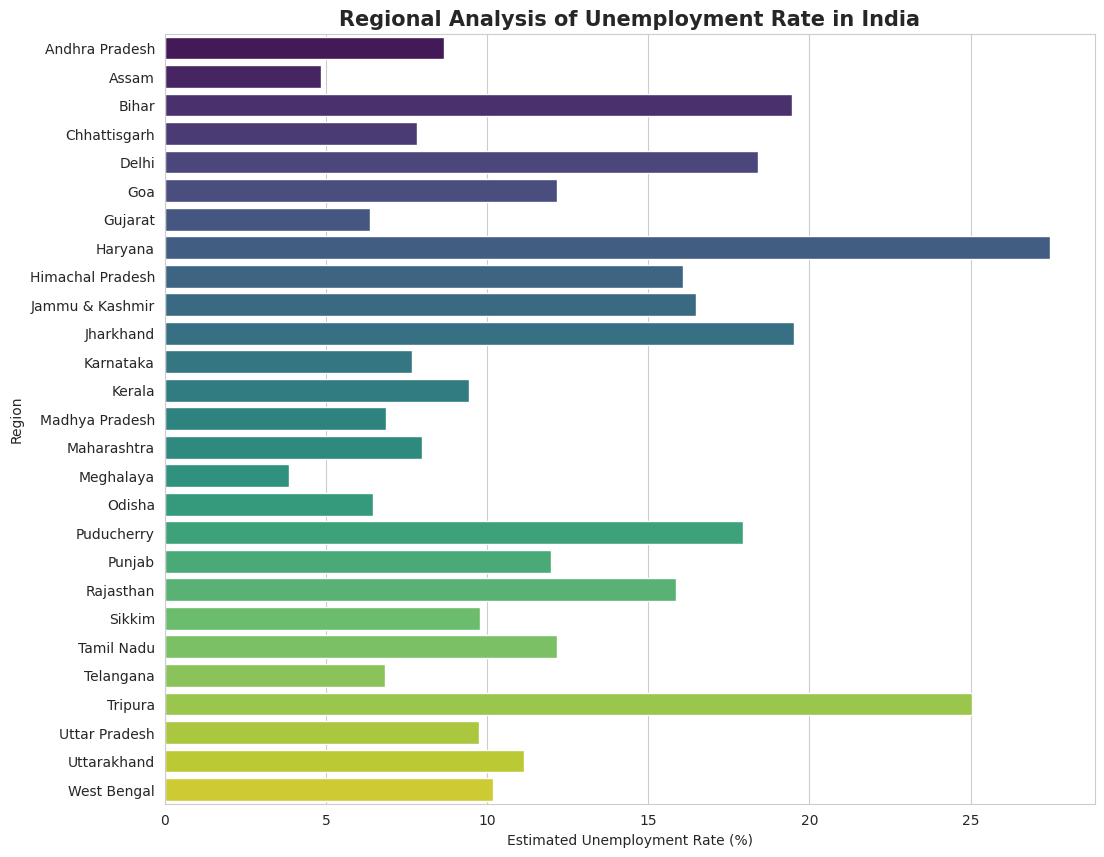

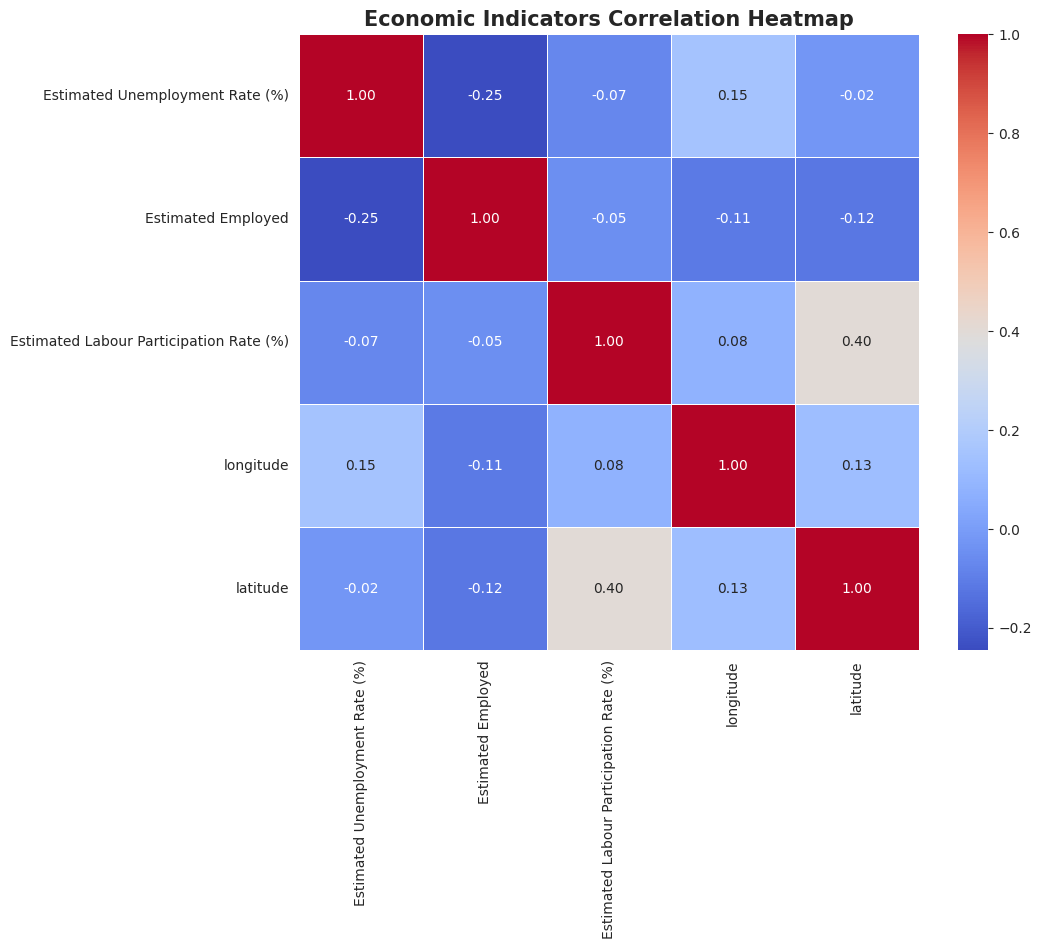

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")
sns.barplot(x='Estimated Unemployment Rate (%)', y='Region', data=df, palette='viridis', errorbar=None)
plt.title("Regional Analysis of Unemployment Rate in India", fontsize=15, fontweight='bold')
plt.show()

plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Economic Indicators Correlation Heatmap", fontsize=15, fontweight='bold')
plt.show()

fig_sunburst = px.sunburst(df, path=["Region", "Region.1"],
                           values="Estimated Unemployment Rate (%)",
                           color="Estimated Unemployment Rate (%)",
                           color_continuous_scale="RdYlGn",
                           title="Hierarchical Unemployment Rate Breakdown")
fig_sunburst.show()

fig_scatter = px.scatter(df, x='Estimated Unemployment Rate (%)',
                         y='Estimated Labour Participation Rate (%)',
                         color='Region', size='Estimated Employed',
                         title="Unemployment vs Labour Participation")
fig_scatter.show()